### Example 1: (Binary Classification) Logistic Regression with sklearn 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [7]:
# Load and Inspect Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target)

X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2,random_state = 42
)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

##### Why logistic regression?
- Core classification algorithm
- Outputs probabilities
- Interpretable baseline

In [13]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [14]:
# Evalute Model
# Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9736842105263158

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[41,  2],
       [ 1, 70]], dtype=int64)

#### Interpretation:
- True positives: correctly detected disease
- False negatives: dangerous misses

In [16]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Key metrics:
- Precision: How reliable positive predictions are
- Recall: How many actual positives were caught
- F1-score: Balance of precision and recall

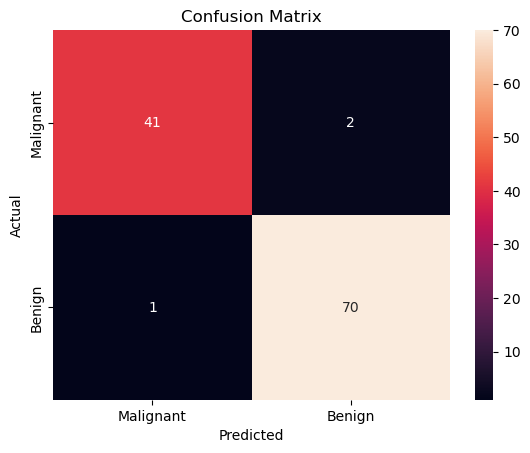

In [18]:
# Visualization of the confusion matrix

import seaborn as sns
sns.heatmap(conf_matrix,annot=True,fmt="d",
           xticklabels=["Malignant","Benign"],
           yticklabels=["Malignant","Benign"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### ML Intuition 
- Classification predicts categories, not numbers
- Logistic regression models probability
- Scaling matters for optimization
- Accuracy alone is not enough
- Recall is critical in medical problems

Next : 

Implement logistic regression from scratch

Use spam dataset with text preprocessing

Compare KNN vs Logistic vs SVM

Explain ROC curve and AUC intuitively

Show overfitting in classification

### Example 2: Logistic Regression From Scratch (Binary Classification)

--- Model Evaluation Metrics ---
Accuracy:  0.9737
Precision: 0.9706
Recall:    0.9851
F1 Score:  0.9778

Confusion Matrix:
TP: 66 | FP: 2
FN: 1 | TN: 45


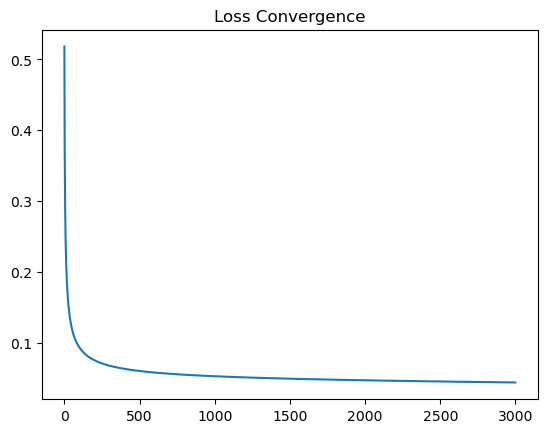

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 1. Load and Split Data
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

np.random.seed(42)
m = X.shape[0]
indices = np.random.permutation(m)
train_size = int(0.8 * m)

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# 2. Scaling and Intercept
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# 3. Model Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, weights):
    m = len(y)
    y_hat = sigmoid(X @ weights)
    epsilon = 1e-9
    return -(1/m) * np.sum(y * np.log(y_hat + epsilon) + (1-y) * np.log(1 - y_hat + epsilon))

def gradient_descent(X, y, weights, lr=0.1, epochs=3000):
    loss_history = []
    for _ in range(epochs):
        y_hat = sigmoid(X @ weights)
        gradient = (1/len(y)) * X.T @ (y_hat - y)
        weights -= lr * gradient
        loss_history.append(compute_loss(X, y, weights))
    return weights, loss_history

# 4. Training
weights = np.zeros((X_train.shape[1], 1))
weights, loss_history = gradient_descent(X_train, y_train, weights)

# 5. Prediction and Manual Metrics
y_prob = sigmoid(X_test @ weights)
y_pred = (y_prob >= 0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred == y_test)

def confusion_matrix_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

tp, tn, fp, fn = confusion_matrix_manual(y_test, y_pred)

# Precision, Recall, and F1
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# 6. Output
print(f"--- Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"\nConfusion Matrix:")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

plt.plot(loss_history)
plt.title("Loss Convergence")
plt.show()

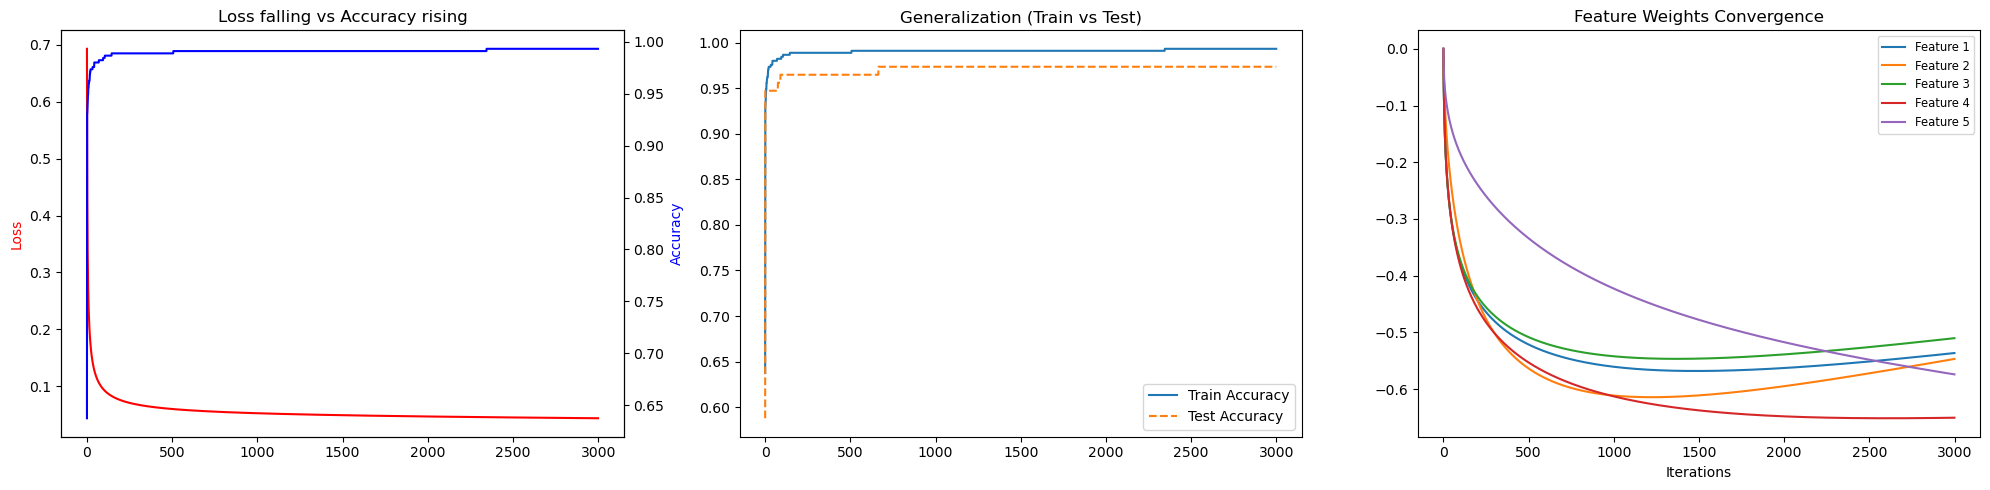

In [99]:
def gradient_descent_extended(X_train, y_train, X_test, y_test, lr=0.1, epochs=3000):
    n_features = X_train.shape[1]
    weights = np.zeros((n_features, 1))
    
    # Storage for visualizations
    loss_history = []
    train_acc_history = []
    test_acc_history = []
    weight_history = [] # To track how feature importance changes

    for i in range(epochs):
        # 1. Forward Pass
        y_hat_train = sigmoid(X_train @ weights)
        
        # 2. Track Metrics
        loss = compute_loss(X_train, y_train, weights)
        loss_history.append(loss)
        
        # Calculate Accuracy for both Train and Test
        train_acc = np.mean((y_hat_train >= 0.5) == y_train)
        train_acc_history.append(train_acc)
        
        y_hat_test = sigmoid(X_test @ weights)
        test_acc = np.mean((y_hat_test >= 0.5) == y_test)
        test_acc_history.append(test_acc)
        
        # Track first 5 feature weights to see them "settle"
        weight_history.append(weights.flatten()[:6].copy())

        # 3. Gradient Step
        gradient = (1/len(y_train)) * X_train.T @ (y_hat_train - y_train)
        weights -= lr * gradient
        
    return weights, loss_history, train_acc_history, test_acc_history, np.array(weight_history)

# Execute the extended training
weights, loss_hist, train_acc_hist, test_acc_hist, w_hist = gradient_descent_extended(
    X_train, y_train, X_test, y_test
)

# --- VISUALIZATION ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: Accuracy vs Loss (Dual Axis)
ax1.plot(loss_hist, color='red', label='Log Loss')
ax1.set_ylabel('Loss', color='red')
ax1_2 = ax1.twinx()
ax1_2.plot(train_acc_hist, color='blue', label='Accuracy')
ax1_2.set_ylabel('Accuracy', color='blue')
ax1.set_title("Loss falling vs Accuracy rising")

# Plot 2: Train vs Test Accuracy (Checking for Overfitting)
ax2.plot(train_acc_hist, label='Train Accuracy')
ax2.plot(test_acc_hist, label='Test Accuracy', linestyle='--')
ax2.set_title("Generalization (Train vs Test)")
ax2.legend()

# Plot 3: Weight Evolution
for i in range(1, w_hist.shape[1]): # Skip intercept at index 0
    ax3.plot(w_hist[:, i], label=f'Feature {i}')
ax3.set_title("Feature Weights Convergence")
ax3.set_xlabel("Iterations")
ax3.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

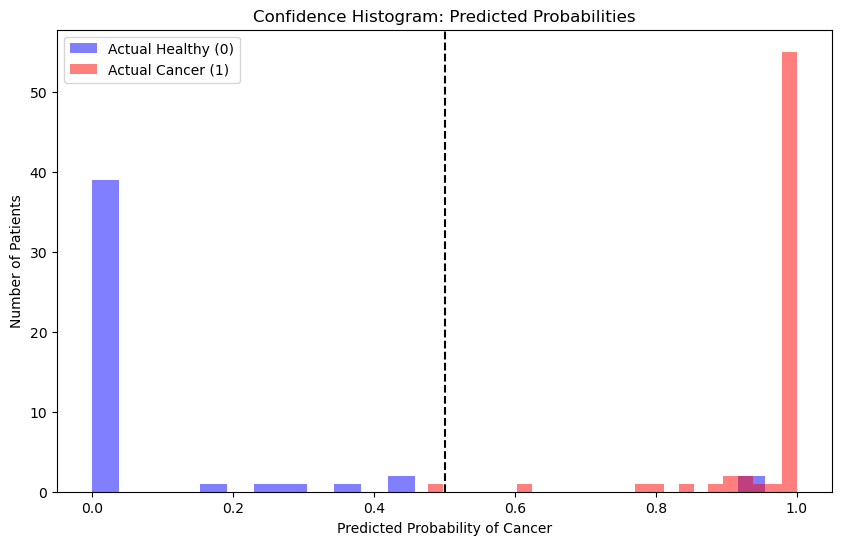

In [100]:
# The Confidence Histogram (Probability Distribution)
# Separate probabilities by their actual true class
prob_class_0 = y_prob[y_test == 0]
prob_class_1 = y_prob[y_test == 1]

plt.figure(figsize=(10, 6))
plt.hist(prob_class_0, bins=25, alpha=0.5, label='Actual Healthy (0)', color='blue')
plt.hist(prob_class_1, bins=25, alpha=0.5, label='Actual Cancer (1)', color='red')
plt.axvline(0.5, color='black', linestyle='--') # The Decision Threshold
plt.title("Confidence Histogram: Predicted Probabilities")
plt.xlabel("Predicted Probability of Cancer")
plt.ylabel("Number of Patients")
plt.legend()
plt.show()

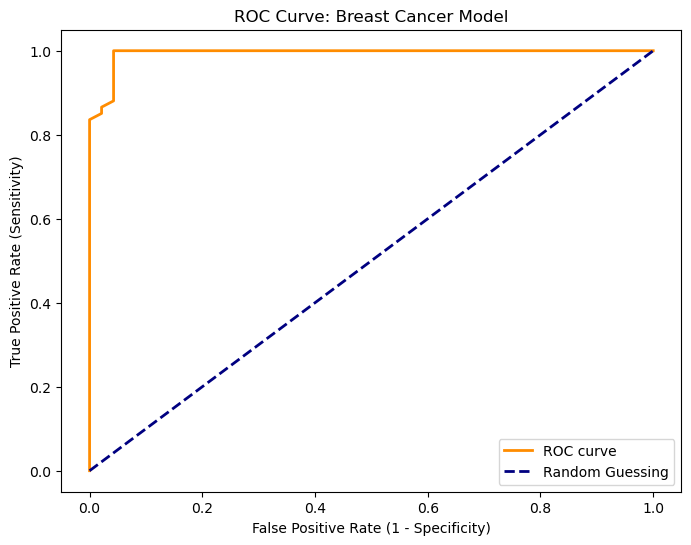

In [101]:
# The ROC Curve (Receiver Operating Characteristic)
def calculate_roc(y_true, y_probs):
    thresholds = np.linspace(0, 1, 100)
    tpr_list = []
    fpr_list = []
    
    for t in thresholds:
        preds = (y_probs >= t).astype(int)
        tp = np.sum((y_true == 1) & (preds == 1))
        fp = np.sum((y_true == 0) & (preds == 1))
        fn = np.sum((y_true == 1) & (preds == 0))
        tn = np.sum((y_true == 0) & (preds == 0))
        
        tpr_list.append(tp / (tp + fn))
        fpr_list.append(fp / (fp + tn))
    return fpr_list, tpr_list

fpr, tpr = calculate_roc(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve: Breast Cancer Model')
plt.legend()
plt.show()

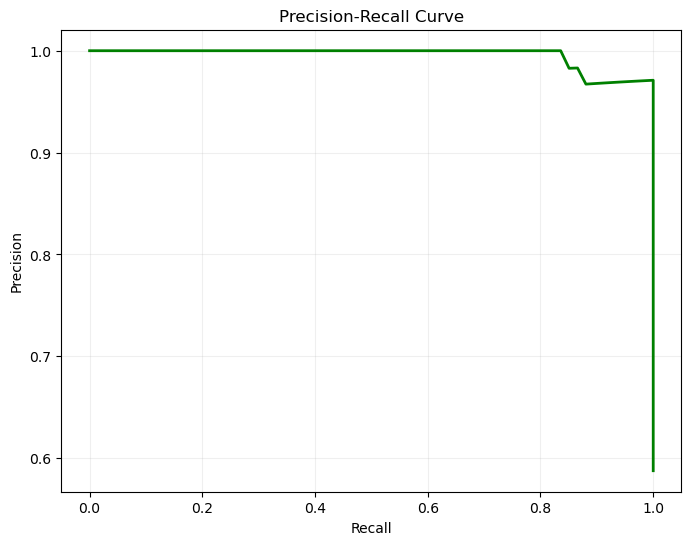

In [102]:
# The Precision-Recall Curve
def calculate_pr(y_true, y_probs):
    thresholds = np.linspace(0, 1, 100)
    precision_list = []
    recall_list = []
    
    for t in thresholds:
        preds = (y_probs >= t).astype(int)
        tp = np.sum((y_true == 1) & (preds == 1))
        fp = np.sum((y_true == 0) & (preds == 1))
        fn = np.sum((y_true == 1) & (preds == 0))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 1
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        precision_list.append(precision)
        recall_list.append(recall)
    return recall_list, precision_list

recalls, precisions = calculate_pr(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(alpha=0.2)
plt.show()

Visualization,What it tells you
- Loss Curve,Is the math converging?
- ROC Curve,How well does it separate classes overall?
- PR Curve,"How reliable are the ""Positive"" predictions?"
- Confidence Histogram,Is the model decisive or confused?
- Confusion Matrix,Exactly how many errors (FP vs FN) occurred?

### Logistic Regression with Manual Evaluation

--- Model Evaluation Metrics ---
Accuracy:  0.0702
Precision: 0.5000
Recall:    0.0597
F1 Score:  0.1067

Confusion Matrix:
TP: 4 | FP: 43
FN: 63 | TN: 4


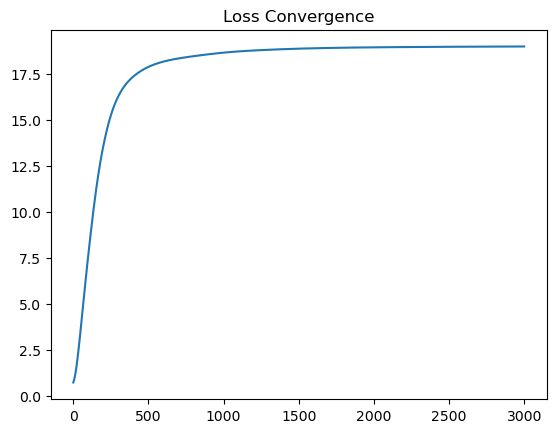

In [113]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 1.Load datasets and split
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1,1)

np.random.seed(42)
m = X.shape[0]
indices = np.random.permutation(m)
train_size = int(0.8*m)

train_idx, test_idx = indices[:train_size],indices[trian_size:]
X_train, X_test = X[train_idx],X[test_idx]
y_train, y_test = y[train_idx],y[test_idx]

# 2.Scaling and Intercept
X_mean, X_std = X_train.mean(axis=0),X_train.std(axis=0)
X_train, X_test = (X_train-X_mean)/X_std, (X_test-X_mean)/X_std

X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]

# 3. Model Functions
def sigmoid(z):
    return 1/(1+np.exp(z))
def compute_loss(X,y,weights):
    m = len(y)
    y_hat = sigmoid(X@weights)
    epsilon = 1e-9
    return -(1/m)*np.sum(y*np.log(y_hat+epsilon)+
                         (1-y)*np.log(1-y_hat+epsilon))
def gradient_descent(X,y,weights,lr=0.01,epochs=3000):
    loss_history = []
    for _ in range(epochs):
        y_hat = sigmoid(X@weights)
        gradient = (1/len(y))*X.T@(y_hat-y)
        weights -=lr*gradient
        loss_history.append(compute_loss(X,y,weights))
    return weights,loss_history
# 4.Training 
weights = np.zeros((X_train.shape[1],1))
weights, loss_history = gradient_descent(X_train,y_train,weights)

# 5.Prediction and Manual Matrics
y_prob = sigmoid(X_test@weights)
y_pred = (y_prob>=0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred == y_test)

def confusion_matrix_manual(y_true,y_pred):
    tp = np.sum((y_true==1)&(y_pred==1))
    tn = np.sum((y_true==0)&(y_pred==0))    
    fp = np.sum((y_true==0)&(y_pred==1))    
    fn = np.sum((y_true==1)&(y_pred==0))        
    return tp,tn,fp,fn
tp,tn,fp,fn = confusion_matrix_manual(y_test,y_pred)

# Precision, Recall, and F1
precision = tp/(tp+tn) if (tp+tn)>0 else 0
recall = tp/(tp+fn) if (tp+fn)>0 else 0
f1 = 2*(precision*recall)/(precision+recall) if (precision+recall)>0 else 0

# 6. Output
print(f"--- Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"\nConfusion Matrix:")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

plt.plot(loss_history)
plt.title("Loss Convergence")
plt.show()

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1,1)

np.random.seed(42)
m = X.shape[0]
indices = np.random.permutation(m)
train_size = int(m*0.8)

train_idx,test_idx = indices[:train_size], indices[train_size:]

X_train,X_test = X[train_idx],X[test_idx]
y_train,y_test = y[train_idx],y[test_idx]

# Rescalling and including the intercept

X_mean,X_std = X_train.mean(axis=0),X_train.std(axis=0)
X_train, X_test = (X_train-X_mean)/X_std, (X_test-X_mean)/X_std

X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]

# 3. Model Functions
def sigmoid(z):
    return 1/(1+np.exp(-z))
def compute_loss(X,y,weights):
    m = len(y)
    y_hat = sigmoid(X@weights)
    epsilon = 1e-9
    return -(1/m)* np.sum(y*np.log(y_hat+epsilon)+
                         (1-y)*np.log(1-y_hat+epsilon))
def gradient_descent(X,y,weights,lr=0.01,epochs=3000):
    loss_history =[]
    for _ in range(epochs):
        y_hat = sigmoid(X@weights)
        gradient = (1/len(y))*X.T@(y_hat-y)
        weights -= lr*gradient
        loss_history.append(compute_loss(X,y,weights))
    return weights, loss_history
weights = np.zeros((X_train.shape[1],1))
weights, loss_history = gradient_descent(X_train,y_train,weights)

y_prob = sigmoid(X_test@weights)
y_pred = (y_prob>=0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred==y_test)

In [141]:
accuracy

0.9649122807017544

### L2 Regularization & ROC/AUC from Scratch

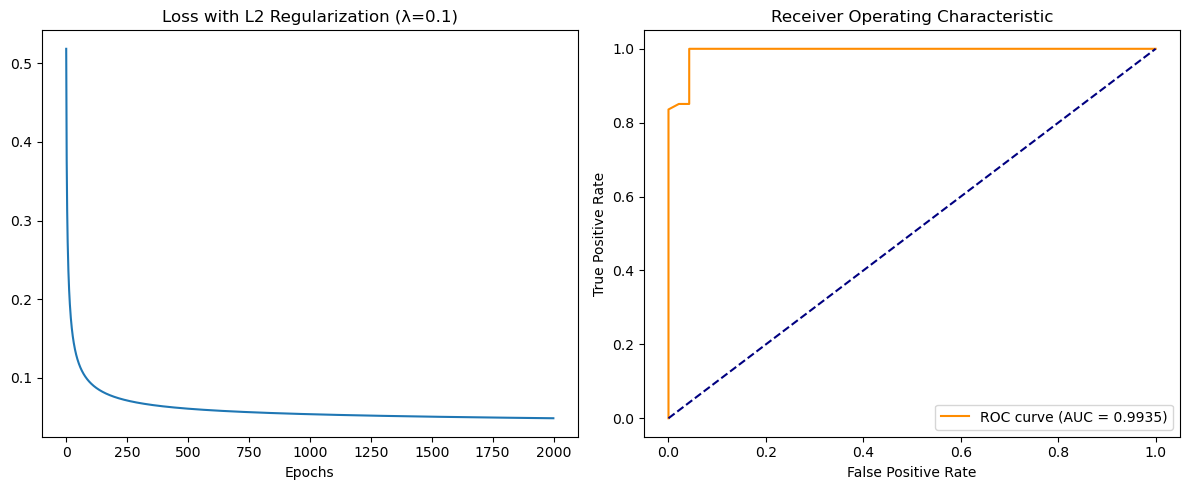

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# --- 1. SETUP ---
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

np.random.seed(42)
indices = np.random.permutation(len(X))
train_idx, test_idx = indices[:int(0.8*len(X))], indices[int(0.8*len(X)):]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Scaling
X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

# Add bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# --- 2. CORE FUNCTIONS WITH L2 REGULARIZATION ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss_l2(X, y, weights, lambda_reg):
    m = len(y)
    y_hat = sigmoid(X @ weights)
    epsilon = 1e-15
    
    # Standard Log Loss
    log_loss = -(1/m) * np.sum(y * np.log(y_hat + epsilon) + (1-y) * np.log(1 - y_hat + epsilon))
    
    # L2 Penalty: (lambda / 2m) * sum(w^2). Note: We don't penalize the intercept (index 0)
    l2_penalty = (lambda_reg / (2 * m)) * np.sum(np.square(weights[1:]))
    
    return log_loss + l2_penalty

def gradient_descent_l2(X, y, weights, lr, epochs, lambda_reg):
    m = len(y)
    loss_history = []
    
    for _ in range(epochs):
        y_hat = sigmoid(X @ weights)
        
        # Gradient with L2 term: (1/m) * X.T @ (y_hat - y) + (lambda/m) * w
        # We create a copy of weights and set the intercept weight to 0 for the penalty calculation
        reg_weights = np.copy(weights)
        reg_weights[0] = 0 
        
        gradient = (1/m) * (X.T @ (y_hat - y)) + (lambda_reg / m) * reg_weights
        weights -= lr * gradient
        loss_history.append(compute_loss_l2(X, y, weights, lambda_reg))
        
    return weights, loss_history

# --- 3. TRAINING ---
weights = np.zeros((X_train.shape[1], 1))
lambda_param = 0.1 # Strength of regularization
weights, loss_hist = gradient_descent_l2(X_train, y_train, weights, lr=0.1, epochs=2000, lambda_reg=lambda_param)

# --- 4. ROC & AUC FROM SCRATCH ---
def get_roc_coordinates(y_true, y_probs):
    thresholds = np.linspace(0, 1, 101)
    tpr_list = []
    fpr_list = []
    
    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        
    return fpr_list, tpr_list

def calculate_auc(fpr, tpr):
    # Using the trapezoidal rule to calculate area under curve
    auc = 0
    for i in range(len(fpr) - 1):
        # We use absolute because thresholds go 0 to 1, causing FPR to go 1 to 0
        width = abs(fpr[i+1] - fpr[i])
        height = (tpr[i] + tpr[i+1]) / 2
        auc += width * height
    return auc

y_probs_test = sigmoid(X_test @ weights)
fpr, tpr = get_roc_coordinates(y_test, y_probs_test)
auc_score = calculate_auc(fpr, tpr)

# --- 5. VISUALIZATION ---
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(loss_hist)
plt.title(f"Loss with L2 Regularization (λ={lambda_param})")
plt.xlabel("Epochs")

# ROC Plot
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 🧠 Advanced Model Analysis & Regularization

This section deepens the understanding of **why logistic regression works**, **where it fails**, and **how we improve it** for better generalization in real-world machine learning problems.

---

## 1. L2 Regularization (Weight Decay)

### Why Regularization is Needed
In machine learning, **overfitting** occurs when a model learns noise or random fluctuations in the training data instead of the underlying pattern. Such a model performs well on training data but poorly on unseen data.

To combat overfitting, we introduce **L2 Regularization**, also known as **weight decay**.

---

### Mathematical Formulation

The regularized cost function for logistic regression becomes:

$$
J(w) = \text{LogLoss} + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$

Where:
- $ \text{LogLoss} $ is the binary cross-entropy loss
- $\lambda $ is the regularization strength
- $ m $ is the number of training samples
- $ w_j $ are the model weights (excluding bias)

---

### Intuition Behind the Penalty Term

$$
\frac{\lambda}{2m} \sum w^2
$$

- Penalizes **large weights**
- Encourages the model to spread importance across features
- Prevents reliance on any single feature

---

### Effect on the Model

- Keeps weights **small and stable**
- Produces a **smoother decision boundary**
- Improves **generalization** on unseen data
- Reduces sensitivity to noise

---

## 2. Understanding Sigmoid Saturation

### Sigmoid Function

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The sigmoid converts raw scores into probabilities between 0 and 1.

---

### Why Saturation Happens

#### Flat Regions
- For very large positive values of $ z $ (e.g., +10), $ \sigma(z) \approx 1 $
- For very large negative values of $ z $ (e.g., -10), $ \sigma(z) \approx 0 $

These regions are **nearly flat**.

---

### Vanishing Gradient Problem

The derivative of sigmoid is:

$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

- In flat regions, the derivative is **close to zero**
- Gradient descent updates become extremely small

---

### Consequence

Since gradient descent updates weights using:

$$
w = w - \eta \cdot \text{gradient}
$$

- Near-zero gradients → **no meaningful updates**
- The model **stops learning**
- This is called **sigmoid saturation**

---

### Practical ML Insight

- Feature scaling helps keep $ z $ values reasonable
- Regularization prevents weights from growing too large
- This is why scaling + regularization are essential together

---

## 3. ROC Curve and AUC Intuition

Accuracy alone can be misleading, especially with **imbalanced datasets**.  
To evaluate classifiers more robustly, we use **ROC curves and AUC**.

---

### ROC Curve (Receiver Operating Characteristic)

A plot of:
- **True Positive Rate (TPR / Recall)** on the y-axis
- **False Positive Rate (FPR)** on the x-axis

It shows model performance across **all classification thresholds**.

---

### AUC (Area Under the Curve)

A single number summarizing the ROC curve.

| AUC Score | Interpretation |
|----------|---------------|
| **1.0** | Perfect model |
| **0.8 – 0.9** | Excellent |
| **0.7 – 0.8** | Good |
| **0.5** | Random guessing |

---

### Why ROC–AUC is Powerful

- Threshold-independent
- Measures **ranking ability**
- Especially useful in medical and risk prediction tasks

---

## 4. Summary of the Learning Process

### End-to-End Logistic Regression Pipeline

1. **Initialize Weights**  
   Start with zeros or small random values.

2. **Forward Pass**  
$$
   z = Xw + b
$$ 
   Apply sigmoid to get probabilities.

3. **Compute Loss**  
   Binary log loss + L2 regularization penalty.

4. **Backward Pass (Gradient Descent)**  
   Compute gradients and update weights.

5. **Evaluate the Model**  
   Use ROC curve and AUC to assess class separation ability.

---

### Key Takeaway

> A good machine learning model is not just accurate — it is **stable, generalizable, and interpretable**.

Regularization, proper activation behavior, and robust evaluation metrics are what make that possible.


### 🐍 K-Fold Cross-Validation From Scratch
This implementation uses the Breast Cancer dataset and the Logistic Regression logic we built previously.

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer

# 1. Load Data
data = load_breast_cancer()
X, y = data.data, data.target.reshape(-1, 1)

def k_fold_cross_validation(X, y, k=5, lr=0.1, epochs=1000, lambda_reg=0.1):
    m = len(y)
    indices = np.arange(m)
    np.random.shuffle(indices) # Shuffle data once at the start
    
    # Split indices into k parts
    fold_sizes = np.full(k, m // k)
    fold_sizes[:m % k] += 1  # Distribute remainder if m is not divisible by k
    
    current = 0
    folds = []
    for size in fold_sizes:
        folds.append(indices[current:current + size])
        current += size

    cv_scores = []

    print(f"Starting {k}-Fold Cross Validation...")
    print("-" * 30)

    for i in range(k):
        # Determine test and train indices for this fold
        test_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # --- Preprocessing inside the fold (to prevent data leakage) ---
        mean = X_train.mean(axis=0)
        std = X_train.std(axis=0)
        X_train_scaled = (X_train - mean) / std
        X_test_scaled = (X_test - mean) / std

        # Add Bias
        X_train_scaled = np.c_[np.ones(len(X_train_scaled)), X_train_scaled]
        X_test_scaled = np.c_[np.ones(len(X_test_scaled)), X_test_scaled]

        # --- Training (Reusing our Gradient Descent logic) ---
        weights = np.zeros((X_train_scaled.shape[1], 1))
        # (Using a simplified version of our previous gradient descent function)
        for _ in range(epochs):
            y_hat = 1 / (1 + np.exp(-(X_train_scaled @ weights)))
            reg_term = (lambda_reg / len(y_train)) * np.copy(weights)
            reg_term[0] = 0
            gradient = (1/len(y_train)) * X_train_scaled.T @ (y_hat - y_train) + reg_term
            weights -= lr * gradient

        # --- Evaluation ---
        y_probs = 1 / (1 + np.exp(-(X_test_scaled @ weights)))
        y_pred = (y_probs >= 0.5).astype(int)
        accuracy = np.mean(y_pred == y_test)
        cv_scores.append(accuracy)

        print(f"Fold {i+1}: Accuracy = {accuracy:.4f}")

    print("-" * 30)
    print(f"Average Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation: {np.std(cv_scores):.4f}")

    return cv_scores

# Run it
scores = k_fold_cross_validation(X, y, k=5)

Starting 5-Fold Cross Validation...
------------------------------
Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9737
Fold 3: Accuracy = 0.9737
Fold 4: Accuracy = 0.9825
Fold 5: Accuracy = 0.9823
------------------------------
Average Accuracy: 0.9824
Standard Deviation: 0.0096


## 🔍 Why Do We Do This?

When evaluating machine learning models, **how** we split and validate data matters as much as **which model** we use. Below is a clear comparison between a **single train–test split** and **K-Fold Cross-Validation**.

---

### 📊 Train–Test Split vs K-Fold Cross-Validation

| Feature | Single Train–Test Split | K-Fold Cross-Validation |
|------|------------------------|-------------------------|
| **Reliability** | Risky. You might get a *lucky* or *unlucky* split | High. Model is evaluated on the entire dataset |
| **Data Usage** | 20–30% of data is never used for training | Every data point is used for both training and testing |
| **Variance** | Produces one performance value | Produces a distribution (mean + standard deviation) |
| **Computation** | Fast (1 training run) | Slower (K training runs) |

---

## ⚠️ Critical Rule: The **Scaling Trap**

When performing **K-Fold Cross-Validation**, feature scaling must be handled with extreme care.

---

### 🚫 The Common Mistake

Scaling the **entire dataset before K-Fold splitting**:

- The scaler learns mean and standard deviation from *all* data
- Training folds indirectly gain information from test folds

---

### ❌ Why This Is a Problem

This introduces **Data Leakage**.

**Data Leakage means:**
- The model has access to information it would not have in the real world
- Cross-validation accuracy becomes **artificially inflated**
- Model appears better than it truly is

---

### ✅ The Correct Approach

Scale **inside each fold**, using **only the training data**:

1. Split data into train and validation fold
2. Compute mean and standard deviation on the training fold only
3. Apply the same transformation to the validation fold

This ensures:
- No future information leaks into training
- Evaluation truly reflects real-world deployment

---

### 🧠 ML Intuition

> Cross-validation should simulate how your model behaves on *completely unseen data*.

Scaling inside the loop is not optional — it is **mandatory** for trustworthy evaluation.

---

### 📌 Key Takeaway

- K-Fold Cross-Validation gives a **more reliable estimate** of model performance
- Improper preprocessing can silently invalidate your results
- Avoiding data leakage is a hallmark of professional ML practice
